<a href="https://colab.research.google.com/github/thien1892/Deep-Learning-for-Computer-Vision/blob/main/1_4_How_to_Scale_Image_Pixel_Data_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Scale Image Pixel Data with Keras
# 1. MNIST Handwritten Image Classification Dataset

In [2]:
import tensorflow as tf
keras = tf.keras
# load and summarize the MNIST dataset
from keras.datasets import mnist
# load dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# summarize dataset shape
print('Train', train_images.shape, train_labels.shape)
print('Test', (test_images.shape, test_labels.shape))
# summarize pixel values
print('Train', train_images.min(), train_images.max(), train_images.mean(), train_images.std())
print('Test', test_images.min(), test_images.max(), test_images.mean(), test_images.std())

11501568/11490434 [==============================] - 0s 0us/step
Train (60000, 28, 28) (60000,)
Test ((10000, 28, 28), (10000,))
Train 0 255 33.318421449829934 78.56748998339798
Test 0 255 33.791224489795916 79.17246322228644


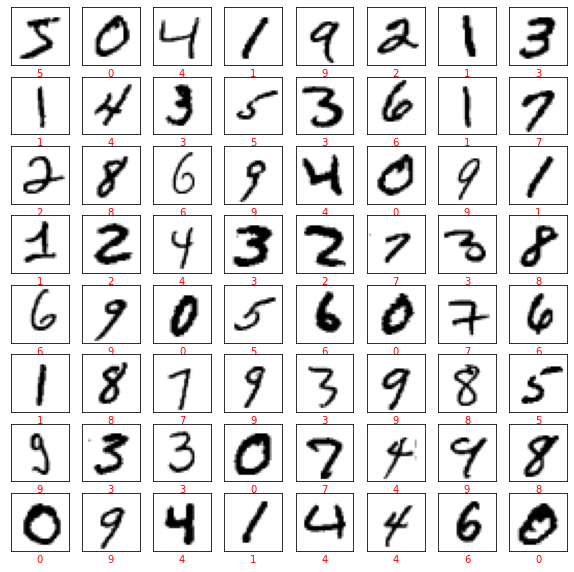

In [19]:
from matplotlib import image
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(64):
  plt.subplot(8,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(train_labels[i], color = 'red')
plt.show()

# 2. How to Normalize Images With ImageDataGenerator

In [3]:
# example of normalizing a image dataset
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
# reshape dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))
# confirm scale of pixels
print('Train min=%.3f, max=%.3f' % (trainX.min(), trainX.max()))
print('Test min=%.3f, max=%.3f' % (testX.min(), testX.max()))
# create generator (1.0/255.0 = 0.003921568627451)
datagen = ImageDataGenerator(rescale=1.0/255.0)
# Note: there is no need to fit the generator in this case
# prepare a iterators to scale images
train_iterator = datagen.flow(trainX, trainY, batch_size=64)
test_iterator = datagen.flow(testX, testY, batch_size=64)
print('Batches train=%d, test=%d' % (len(train_iterator), len(test_iterator)))
# confirm the scaling works
batchX, batchy = train_iterator.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Train min=0.000, max=255.000
Test min=0.000, max=255.000
Batches train=938, test=157
Batch shape=(64, 28, 28, 1), min=0.000, max=1.000


# 3. How to Center Images With ImageDataGenerator

In [21]:
# example of centering a image dataset
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# reshape dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))
# report per-image mean
print('Means train=%.3f, test=%.3f' % (trainX.mean(), testX.mean()))
# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True)
# calculate the mean on the training dataset
datagen.fit(trainX)
print('Data Generator Mean: %.3f' % datagen.mean)
# demonstrate effect on a single batch of samples
iterator = datagen.flow(trainX, trainy, batch_size=64)
# get a batch
batchX, batchy = iterator.next()
# mean pixel value in the batch
print(batchX.shape, batchX.mean())
# demonstrate effect on entire training dataset
iterator = datagen.flow(trainX, trainy, batch_size=len(trainX), shuffle=False)
# get a batch
batchX, batchy = iterator.next()
# mean pixel value in the batch
print(batchX.shape, batchX.mean())

Means train=33.318, test=33.791
Data Generator Mean: 33.318
(64, 28, 28, 1) -0.38447547
(60000, 28, 28, 1) -1.9512918e-05


# 4. How to Standardize Images With ImageDataGenerator

In [23]:
# example of standardizing a image dataset
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# reshape dataset to have a single channel
width, height, channels = trainX.shape[1], trainX.shape[2], 1
trainX = trainX.reshape((trainX.shape[0], width, height, channels))
testX = testX.reshape((testX.shape[0], width, height, channels))
# report pixel means and standard deviations
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (trainX.mean(), trainX.std(),
testX.mean(), testX.std()))
# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# calculate the mean on the training dataset
datagen.fit(trainX)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))
# demonstrate effect on a single batch of samples
iterator = datagen.flow(trainX, trainy, batch_size=64)
# get a batch
batchX, batchy = iterator.next()
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())
# demonstrate effect on entire training dataset
iterator = datagen.flow(trainX, trainy, batch_size=len(trainX), shuffle=False)
# get a batch
batchX, batchy = iterator.next()
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

Statistics train=33.318 (78.567), test=33.791 (79.172)
Data Generator mean=33.318, std=78.567
(64, 28, 28, 1) -0.021202493 0.9735718
(60000, 28, 28, 1) -3.4560264e-07 0.9999998


# Extensions
This section lists some ideas for extending the tutorial that you may wish to explore.
- Color. Update an example to use an image dataset with color images and confirm that scaling is performed across the entire image rather than per-channel.
- Sample-Wise. Demonstrate an example of sample-wise centering or standardization of pixel images.
- ZCA Whitening. Demonstrate an example of using the ZCA approach to image data preparation.